**Problem statement**- Develop a predictive framework for enabling proactive retention strategy for a Telecom company

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('TelcoChurn.csv')
df.shape

(7043, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 No null values are present in any column

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


outliers are present in the column 'TotalCharges'

In [6]:
df['customerID'].isnull().sum()

0

## Label the churn feature

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
df['target'] = np.where(df['Churn'] == 'Yes',1,0)

### Drop churn feature to retain only target

In [9]:
df = df.drop('Churn',axis = 1)

In [10]:
df = df.drop('customerID', axis = 1)

In [11]:
y = df[['target']]
x = df.drop(['target'],axis = 1)

In [12]:
# churn rate
y.mean()

target    0.26537
dtype: float64

customers who are enrolled for long period are not churned

In [13]:
df_cat = df.select_dtypes(include = 'object')

In [14]:
column_list = df_cat
for column_name in column_list:
    print(column_name," ",df[column_name].unique())

gender   ['Female' 'Male']
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
PhoneService   ['No' 'Yes']
MultipleLines   ['No phone service' 'No' 'Yes']
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   ['No' 'Yes' 'No internet service']
OnlineBackup   ['Yes' 'No' 'No internet service']
DeviceProtection   ['No' 'Yes' 'No internet service']
TechSupport   ['No' 'Yes' 'No internet service']
StreamingTV   ['No' 'Yes' 'No internet service']
StreamingMovies   ['No' 'Yes' 'No internet service']
Contract   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [15]:
# alternatively
for column in df:
    if df[column].dtypes == 'object':
        print(f'{column} : {df[column].unique()}') 
        

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


categorical columns and their unique values

In [16]:
# splitting features to numerical and categorical
num = x.select_dtypes(include = 'number')
char = x.select_dtypes(include = 'object')


In [17]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [18]:
# check whether senior citizen is an indicator
num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [19]:
ind = num[['SeniorCitizen']]
num = num.drop(['SeniorCitizen'], axis = 1)

In [20]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


### outlier analysis for numerical features

In [21]:
num.describe(percentiles = [0.01,0.05,0.10,0.25,0.30,0.50,0.60,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,50%,60%,75%,90%,95%,99%,max
tenure,7043.0,32.371149,24.559481,0.00,1.000,1.00,2.00,9.00,12.00,29.00,40.00,55.00,69.00,72.000,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,19.200,19.65,20.05,35.50,45.85,70.35,79.10,89.85,102.60,107.400,114.729,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,19.871,49.07,83.47,398.55,548.40,1394.55,2043.71,3786.60,5973.69,6921.025,8039.256,8684.80


Mean and median of total charges 2279.8,1395 indicates positively skewed 

## capping and flooring of outliers

In [22]:
# values outside the interval are limited to 5% and 95%
def outlier_cap(x):
    x = x.clip(lower = x.quantile(0.05))
    x = x.clip(upper = x.quantile(0.95))
    return(x)

In [23]:
num = num.apply(lambda x : outlier_cap(x))

In [24]:
num.describe(percentiles = [0.01,0.03,0.96]).T

,count,mean,std,min,1%,3%,50%,96%,max
tenure,7043.0,32.372710,24.557454,1.00,1.00,1.00,29.00,72.000,72.000
MonthlyCharges,7043.0,64.566357,29.747902,19.65,19.65,19.65,70.35,107.400,107.400
TotalCharges,7043.0,2246.127358,2185.556691,49.07,49.07,49.07,1394.55,6921.025,6921.025


### Feature selection - Numerical Features 

### part 1: Remove  features with 0 variance

In [25]:
from sklearn.feature_selection import VarianceThreshold

varselector = VarianceThreshold(threshold = 0)       # remove columns with zero variance
varselector.fit_transform(num)
cols = varselector.get_support(indices = True)
num_1 = num.iloc[:,cols]

In [26]:
num_1

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,49.070
1,34.0,56.95,1889.500
2,2.0,53.85,108.150
3,45.0,42.30,1840.750
4,2.0,70.70,151.650
...,...,...,...
7038,24.0,84.80,1990.500
7039,72.0,103.20,6921.025
7040,11.0,29.60,346.450
7041,4.0,74.40,306.600


### part-2 Bivariate Analysis

In [27]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


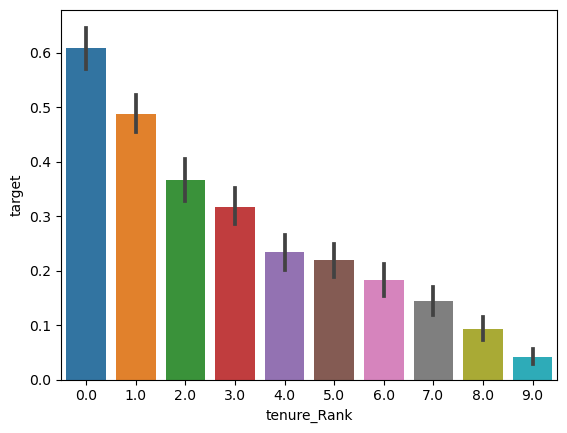

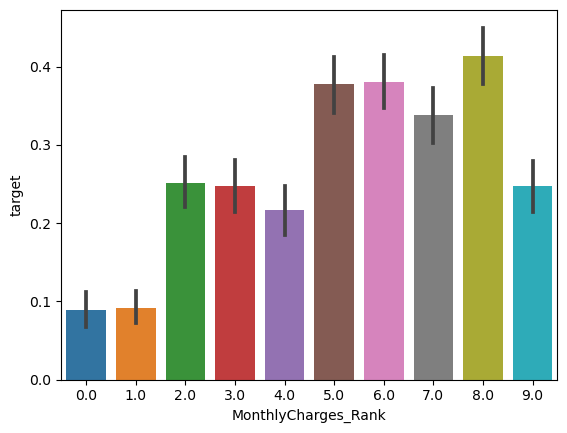

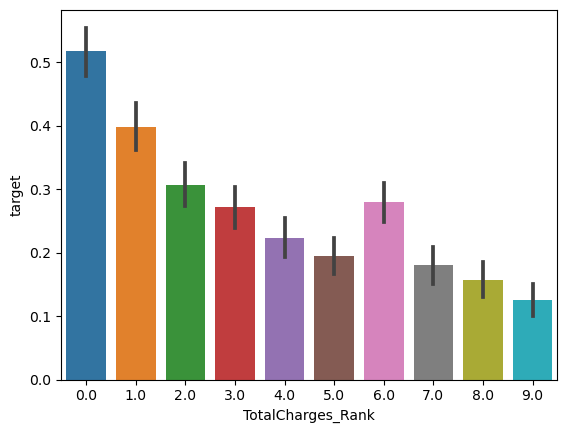

In [28]:
# binning is used to get a  continuous distribution by rounding off to nearest values 
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [29]:
select_features_df_num = num_1

In [30]:
num_1.shape

(7043, 3)

## Feature Selection - Categorical Variables

In [31]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

## Bivariate Analysis

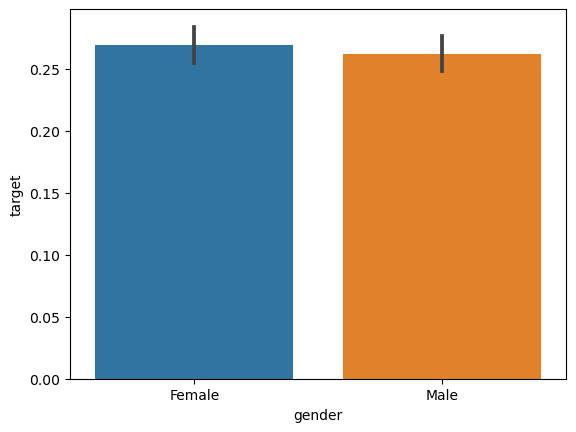

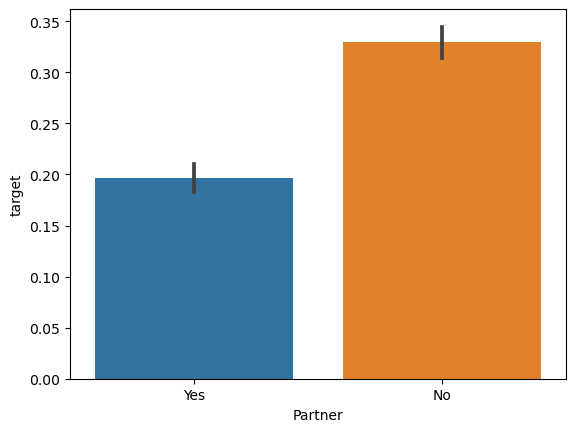

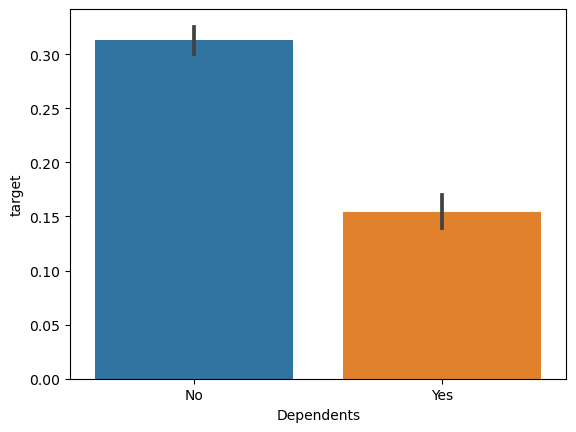

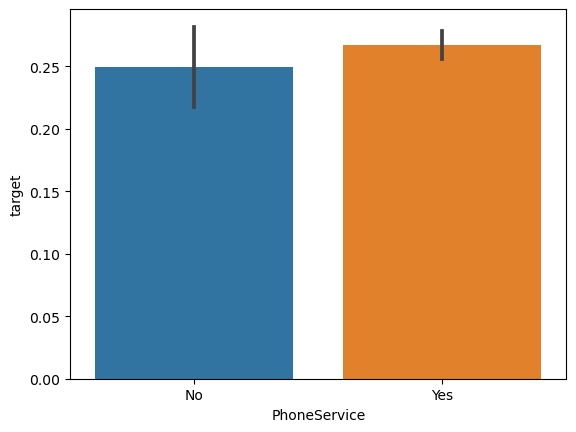

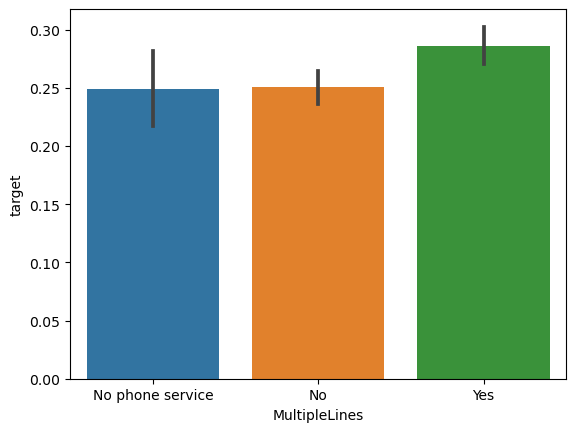

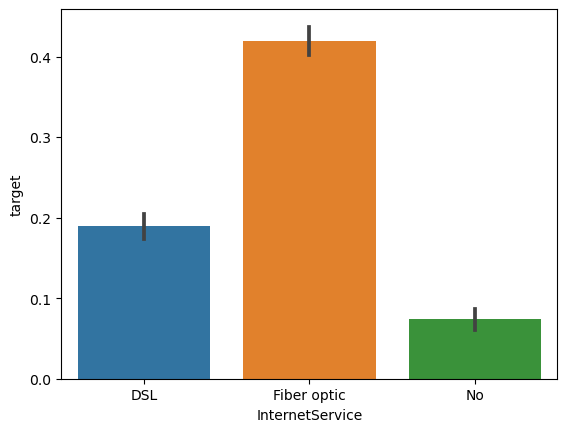

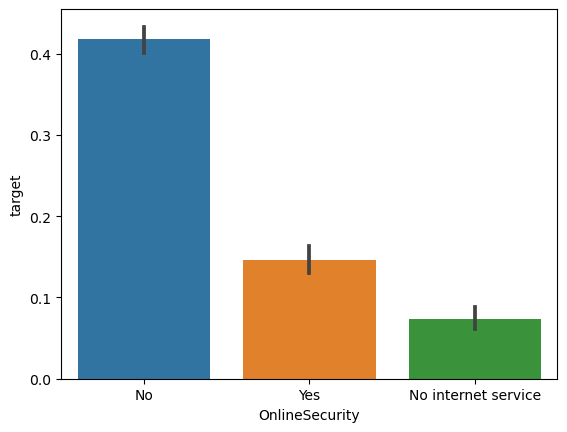

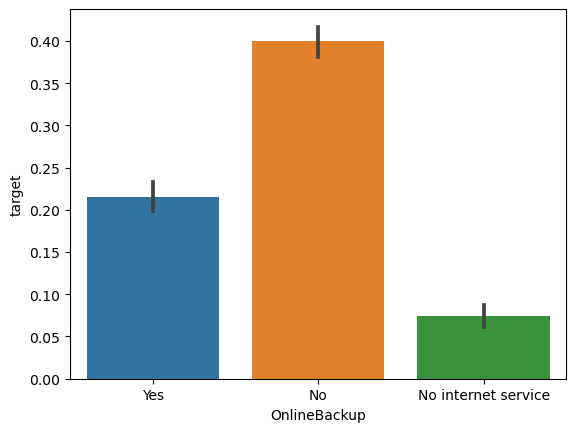

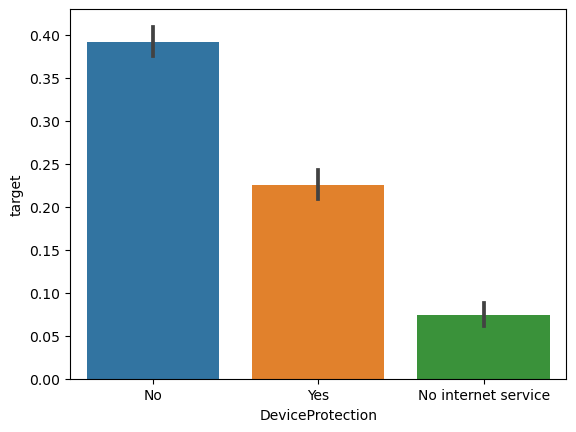

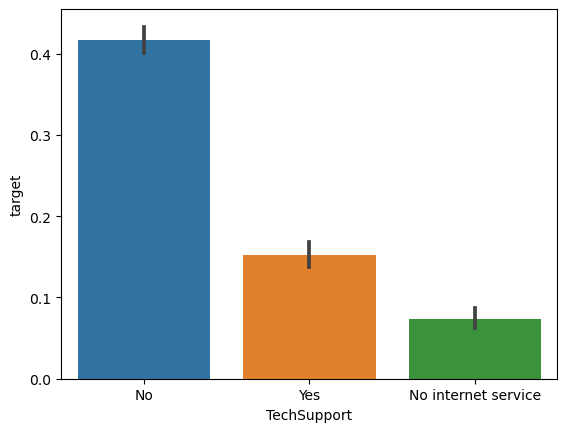

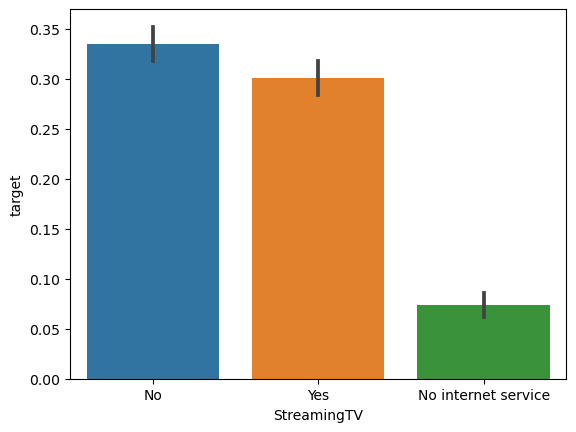

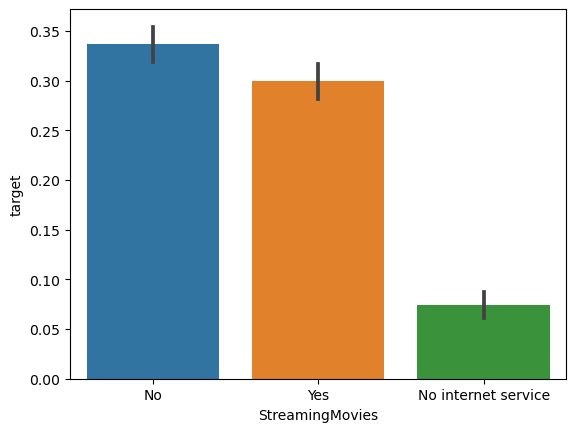

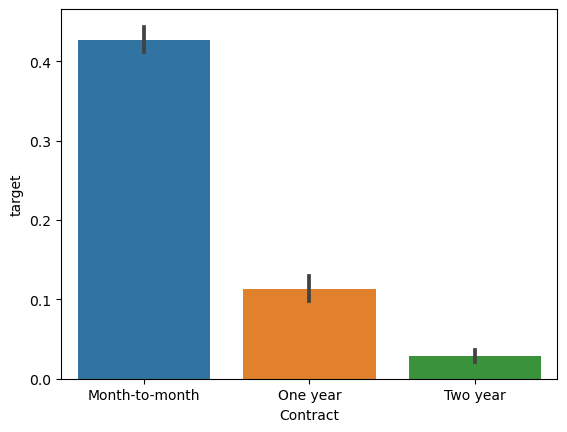

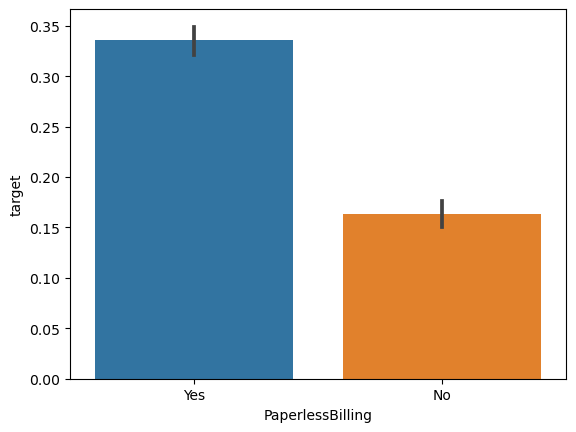

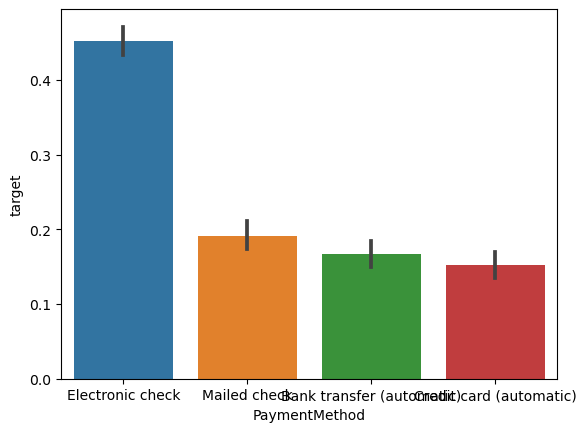

In [32]:
x_char_merged = pd.concat([y,char],axis = 1,join = 'inner')
x_char_merged

from numpy import mean
for col in char.columns:
    plt.figure()
    sns.barplot(x = col, y = "target", data = x_char_merged, estimator = mean)
plt.show()

In [33]:
# drop columns which does not affect churning rate
char = char.drop(['gender','PhoneService','MultipleLines'],axis = 1)


In [34]:
#create dummy features
x_char_dum = pd.get_dummies(char, drop_first = True)
x_char_dum.shape

(7043, 22)

In [35]:
x_char_dum

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,1,1,1,0,0,0,0,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### select K-best

In [36]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k = 20)
selector.fit_transform(x_char_dum,y)

cols = selector.get_support(indices = True)
select_features_df_char = x_char_dum.iloc[:,cols]

In [37]:
select_features_df_char.iloc[0] 

Partner_Yes                              1
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingMovies_No internet service      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           1
PaymentMethod_Mailed check               0
Name: 0, dtype: uint8

 ## Feature Selection - Numerical features

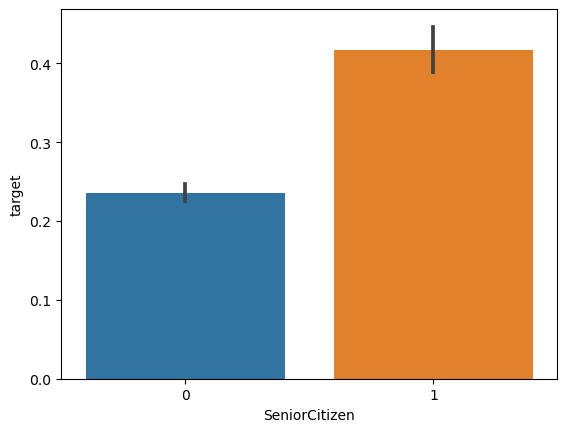

In [38]:
x_ind_merged=pd.concat([y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x = col,y = 'target', data = x_ind_merged, estimator = mean)
plt.show()

In [39]:
select_features_df_ind=ind

## Creating the Master Feature Set for Model Development

In [40]:
X_all=pd.concat([select_features_df_char,select_features_df_num,select_features_df_ind],axis=1,join="inner")

In [41]:
X_all

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1.0,29.85,49.070,0
1,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,34.0,56.95,1889.500,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,2.0,53.85,108.150,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,45.0,42.30,1840.750,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,2.0,70.70,151.650,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,...,1,0,1,0,0,1,24.0,84.80,1990.500,0
7039,1,1,1,0,0,0,0,1,0,1,...,1,0,1,1,0,0,72.0,103.20,6921.025,0
7040,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,11.0,29.60,346.450,0
7041,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,4.0,74.40,306.600,1


In [42]:
y['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

##  Train test split

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_all, y , test_size = 0.3, random_state = 10)


In [44]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (4930, 24)
Shape of Testing Data (2113, 24)
Response Rate in Training Data target    0.266126
dtype: float64
Response Rate in Testing Data target    0.263606
dtype: float64


In [45]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [47]:
# To obtain weights of each feature
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df['Coefficient Estimate'] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,-0.036422
1,Dependents_Yes,-0.187781
2,InternetService_Fiber optic,0.466717
3,InternetService_No,-0.153773
4,OnlineSecurity_No internet service,-0.153773
5,OnlineSecurity_Yes,-0.521863
6,OnlineBackup_No internet service,-0.153773
7,OnlineBackup_Yes,-0.249851
8,DeviceProtection_No internet service,-0.153773
9,DeviceProtection_Yes,-0.135604


In [48]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [49]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dict = {'max_depth': [3,5,6,7], 'min_samples_split': [50, 100, 150, 200, 250]}
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dict,n_jobs = 3)
tree_grid = GridSearchCV(dtree, cv = 10, param_grid = param_dict,n_jobs = 3)
tree_grid.fit(X_train,y_train)
print('Best parameters using grid search: \n',tree_grid.best_params_)

Best parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 50}


In [50]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 6, min_samples_split = 50)
dtree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=0)

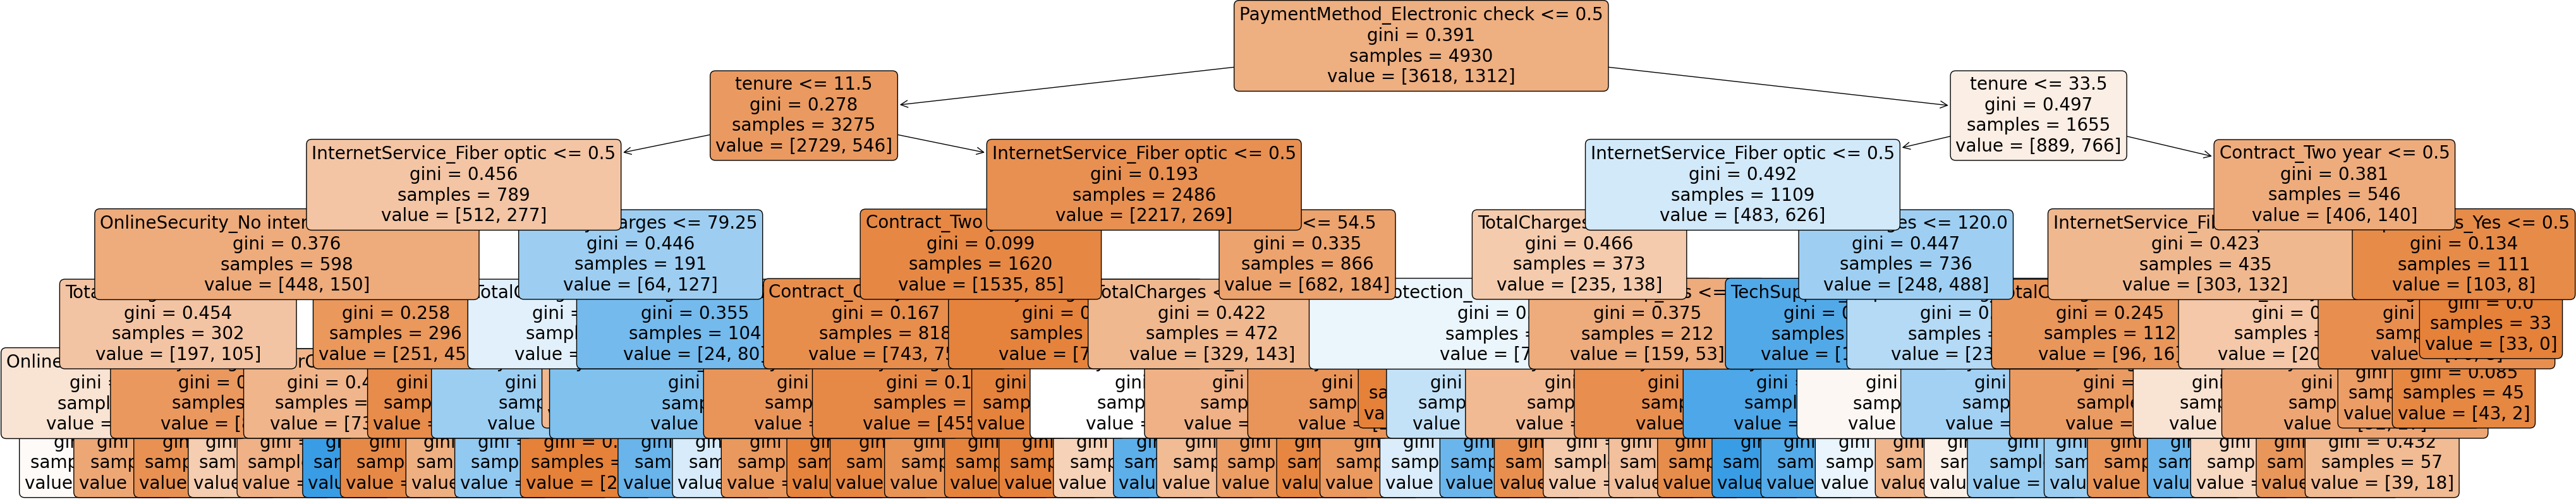

In [54]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize = [50,10])
tree.plot_tree(dtree,filled = True,fontsize = 20,rounded = True, feature_names=X_all.columns)
plt.show()

In [56]:
# Building a random forrest regressor
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(criterion = 'gini', random_state = 0,max_depth = 6,min_samples_split = 50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [58]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.202032
TotalCharges,0.142111
InternetService_Fiber optic,0.116127
PaymentMethod_Electronic check,0.088409
MonthlyCharges,0.083951
Contract_Two year,0.076683
OnlineSecurity_Yes,0.038407
Contract_One year,0.036622
InternetService_No,0.028763
TechSupport_Yes,0.028533


In [59]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [60]:
# by defaut gini impurity is assigned to feature importance
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.213507
MonthlyCharges,0.178987
TotalCharges,0.166517
PaymentMethod_Electronic check,0.135038
InternetService_Fiber optic,0.128263
Contract_Two year,0.035086
Contract_One year,0.033599
PaperlessBilling_Yes,0.019744
OnlineSecurity_Yes,0.016785
TechSupport_Yes,0.014640


In [62]:
base_learners = [
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)),
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50))  
                       ] 

In [63]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [64]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=6,
                                                           min_samples_split=50,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [65]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_stacking=clf.predict(X_test)


In [66]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [67]:
# confusion matric using predicted logistic regresssion
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))



Accuracy: 0.7983909133932797
Precision 0.6408602150537634
Recall 0.5350089766606823
f1_score 0.5831702544031311


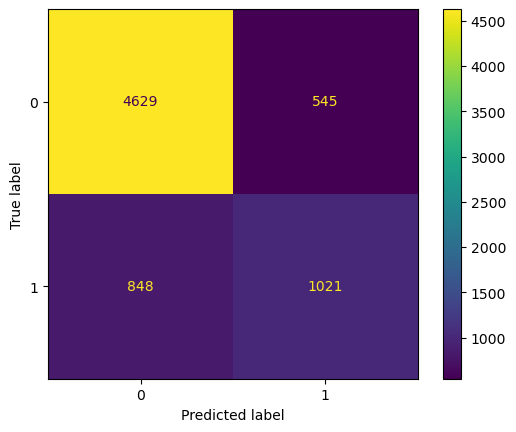

In [68]:
metrics.plot_confusion_matrix(logreg,X_all,y)

In [69]:
# confusion matrix using D-tree
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7950780880265026
Precision 0.6483253588516746
Recall 0.4865350089766607
f1_score 0.5558974358974359


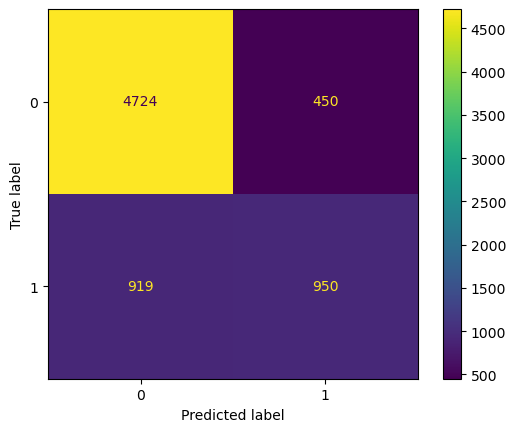

In [71]:
metrics.plot_confusion_matrix(dtree,X_all,y)

In [72]:
# confusion matrix using random forest
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.7998106956933271
Precision 0.6700507614213198
Recall 0.473967684021544
f1_score 0.5552050473186119


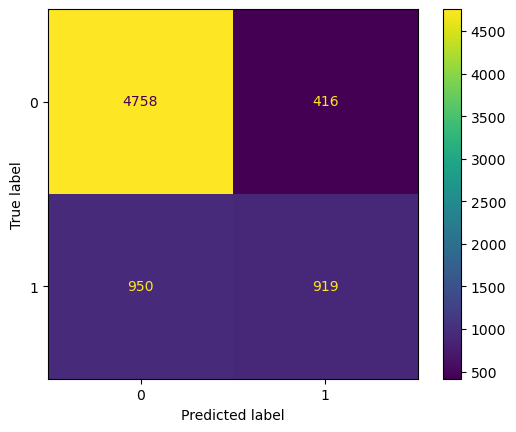

In [74]:
metrics.plot_confusion_matrix(rf,X_all,y)

In [75]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.7998106956933271
Precision 0.6437768240343348
Recall 0.5385996409335727
f1_score 0.5865102639296188


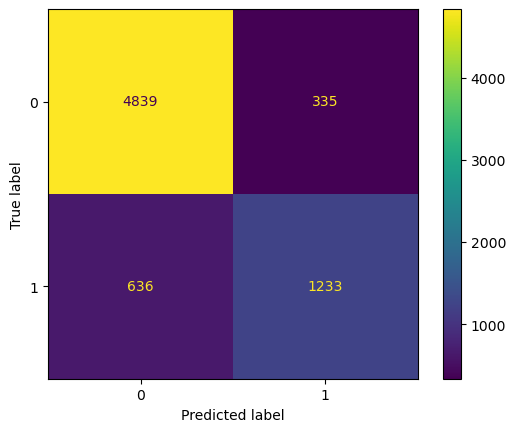

In [77]:
metrics.plot_confusion_matrix(gbm,X_all,y)

In [78]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacking))
print("Precision",metrics.precision_score(y_test,y_pred_stacking))
print("Recall",metrics.recall_score(y_test,y_pred_stacking))
print("f1_score",metrics.f1_score(y_test,y_pred_stacking))

Accuracy: 0.7983909133932797
Precision 0.6519721577726219
Recall 0.5044883303411131
f1_score 0.5688259109311742


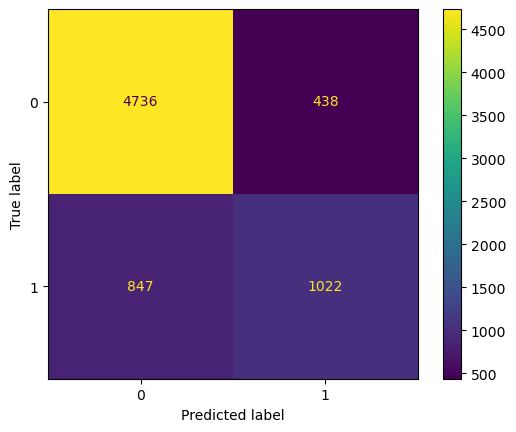

In [80]:
metrics.plot_confusion_matrix(clf,X_all,y)

In [88]:
# logistic lorenz curve
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.747518,0.744501,527.0,527.0,0.281969,0.281969,178.0,178.0,0.034403,0.034403,0.2476,0.100099,0.100099,1
1,9,704,0.580966,0.598732,409.0,936.0,0.218834,0.500803,295.0,473.0,0.057016,0.091419,0.4094,0.099957,0.200057,2
2,8,704,0.458807,0.459433,323.0,1259.0,0.172820,0.673622,381.0,854.0,0.073637,0.165056,0.5086,0.099957,0.300014,3
3,7,704,0.294034,0.328974,207.0,1466.0,0.110754,0.784377,497.0,1351.0,0.096057,0.261113,0.5233,0.099957,0.399972,4
4,6,704,0.228693,0.225370,161.0,1627.0,0.086142,0.870519,543.0,1894.0,0.104948,0.366061,0.5045,0.099957,0.499929,5
5,5,705,0.160284,0.151917,113.0,1740.0,0.060460,0.930979,592.0,2486.0,0.114418,0.480479,0.4505,0.100099,0.600028,6
6,4,704,0.079545,0.095764,56.0,1796.0,0.029963,0.960942,648.0,3134.0,0.125242,0.605721,0.3552,0.099957,0.699986,7
7,3,704,0.062500,0.054107,44.0,1840.0,0.023542,0.984484,660.0,3794.0,0.127561,0.733282,0.2512,0.099957,0.799943,8
8,2,704,0.026989,0.025751,19.0,1859.0,0.010166,0.994650,685.0,4479.0,0.132393,0.865675,0.1290,0.099957,0.899901,9
9,1,705,0.014184,0.007659,10.0,1869.0,0.005350,1.000000,695.0,5174.0,0.134325,1.000000,-0.0000,0.100099,1.000000,10


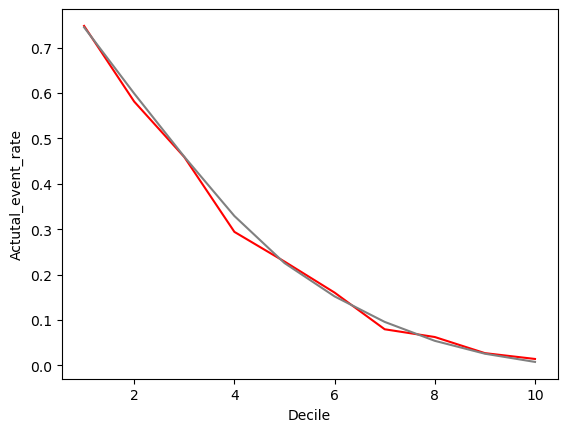

In [89]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [90]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.756028,0.772067,533.0,533.0,0.285179,0.285179,172.0,172.0,0.033243,0.033243,0.2519,0.100099,0.100099,1
1,9,704,0.596591,0.608344,420.0,953.0,0.224719,0.509898,284.0,456.0,0.054890,0.088133,0.4218,0.099957,0.200057,2
2,8,704,0.417614,0.435819,294.0,1247.0,0.157303,0.667202,410.0,866.0,0.079242,0.167375,0.4998,0.099957,0.300014,3
3,7,704,0.326705,0.322880,230.0,1477.0,0.123060,0.790262,474.0,1340.0,0.091612,0.258987,0.5313,0.099957,0.399972,4
4,6,704,0.215909,0.209595,152.0,1629.0,0.081327,0.871589,552.0,1892.0,0.106687,0.365675,0.5059,0.099957,0.499929,5
5,5,705,0.160284,0.154631,113.0,1742.0,0.060460,0.932049,592.0,2484.0,0.114418,0.480093,0.4520,0.100099,0.600028,6
6,4,704,0.110795,0.098992,78.0,1820.0,0.041734,0.973783,626.0,3110.0,0.120990,0.601082,0.3727,0.099957,0.699986,7
7,3,704,0.041193,0.037890,29.0,1849.0,0.015516,0.989299,675.0,3785.0,0.130460,0.731542,0.2578,0.099957,0.799943,8
8,2,704,0.017045,0.016893,12.0,1861.0,0.006421,0.995720,692.0,4477.0,0.133746,0.865288,0.1304,0.099957,0.899901,9
9,1,705,0.011348,0.003096,8.0,1869.0,0.004280,1.000000,697.0,5174.0,0.134712,1.000000,-0.0000,0.100099,1.000000,10


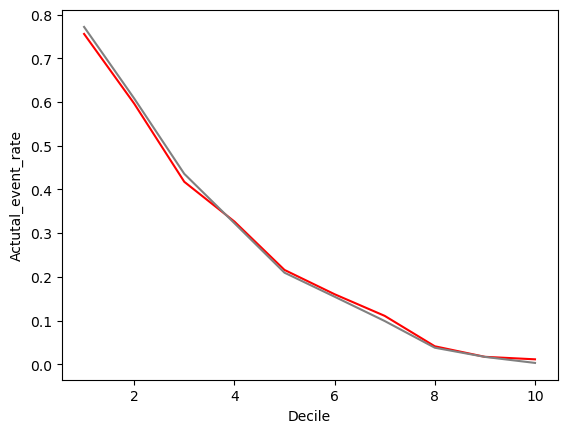

In [91]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [ ]:
# Random Forest Lorenz Curve

In [92]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.768794,0.683240,542.0,542.0,0.289995,0.289995,163.0,163.0,0.031504,0.031504,0.2585,0.100099,0.100099,1
1,9,704,0.596591,0.542220,420.0,962.0,0.224719,0.514714,284.0,447.0,0.054890,0.086394,0.4283,0.099957,0.200057,2
2,8,704,0.451705,0.426840,318.0,1280.0,0.170144,0.684858,386.0,833.0,0.074604,0.160997,0.5239,0.099957,0.300014,3
3,7,704,0.316761,0.317997,223.0,1503.0,0.119315,0.804173,481.0,1314.0,0.092965,0.253962,0.5502,0.099957,0.399972,4
4,6,704,0.225852,0.242626,159.0,1662.0,0.085072,0.889246,545.0,1859.0,0.105334,0.359296,0.5299,0.099957,0.499929,5
5,5,705,0.124823,0.180473,88.0,1750.0,0.047084,0.936330,617.0,2476.0,0.119250,0.478547,0.4578,0.100099,0.600028,6
6,4,704,0.099432,0.127391,70.0,1820.0,0.037453,0.973783,634.0,3110.0,0.122536,0.601082,0.3727,0.099957,0.699986,7
7,3,704,0.051136,0.080691,36.0,1856.0,0.019262,0.993044,668.0,3778.0,0.129107,0.730189,0.2629,0.099957,0.799943,8
8,2,704,0.017045,0.038349,12.0,1868.0,0.006421,0.999465,692.0,4470.0,0.133746,0.863935,0.1355,0.099957,0.899901,9
9,1,705,0.001418,0.017752,1.0,1869.0,0.000535,1.000000,704.0,5174.0,0.136065,1.000000,0.0000,0.100099,1.000000,10


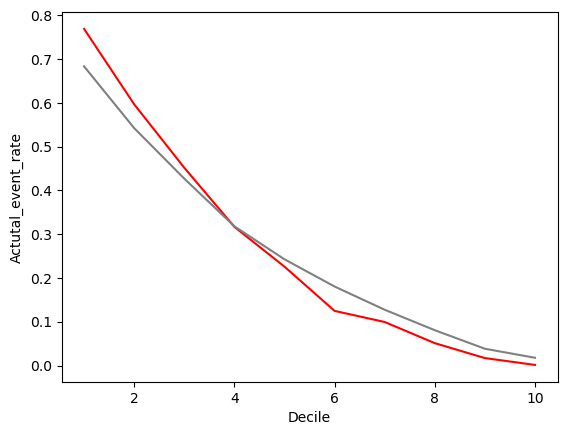

In [93]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [94]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.914894,0.819941,645.0,645.0,0.345104,0.345104,60.0,60.0,0.011596,0.011596,0.3335,0.100099,0.100099,1
1,9,704,0.698864,0.617973,492.0,1137.0,0.263242,0.608347,212.0,272.0,0.040974,0.052571,0.5558,0.099957,0.200057,2
2,8,704,0.478693,0.451557,337.0,1474.0,0.180310,0.788657,367.0,639.0,0.070932,0.123502,0.6652,0.099957,0.300014,3
3,7,704,0.262784,0.305020,185.0,1659.0,0.098983,0.887640,519.0,1158.0,0.100309,0.223811,0.6638,0.099957,0.399972,4
4,6,704,0.161932,0.194536,114.0,1773.0,0.060995,0.948636,590.0,1748.0,0.114032,0.337843,0.6108,0.099957,0.499929,5
5,5,705,0.059574,0.120531,42.0,1815.0,0.022472,0.971108,663.0,2411.0,0.128141,0.465984,0.5051,0.100099,0.600028,6
6,4,704,0.039773,0.072378,28.0,1843.0,0.014981,0.986089,676.0,3087.0,0.130653,0.596637,0.3895,0.099957,0.699986,7
7,3,704,0.025568,0.035795,18.0,1861.0,0.009631,0.995720,686.0,3773.0,0.132586,0.729223,0.2665,0.099957,0.799943,8
8,2,704,0.008523,0.017916,6.0,1867.0,0.003210,0.998930,698.0,4471.0,0.134905,0.864128,0.1348,0.099957,0.899901,9
9,1,705,0.002837,0.010845,2.0,1869.0,0.001070,1.000000,703.0,5174.0,0.135872,1.000000,0.0000,0.100099,1.000000,10


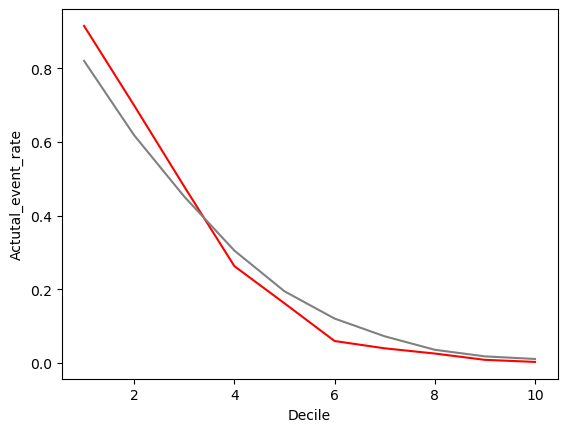

In [95]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [96]:
y_pred_prob = clf.predict_proba(X_all)[:, 1]
df['pred_prob_stacking']=pd.DataFrame(y_pred_prob)
df['P_Rank_stacking']=pd.qcut(df['pred_prob_stacking'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_stacking')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_stacking')['pred_prob_stacking'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_stacking',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_stacking,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.807092,0.777744,569.0,569.0,0.304441,0.304441,136.0,136.0,0.026285,0.026285,0.2782,0.100099,0.100099,1
1,9,704,0.610795,0.597375,430.0,999.0,0.230070,0.534510,274.0,410.0,0.052957,0.079242,0.4553,0.099957,0.200057,2
2,8,704,0.463068,0.417496,326.0,1325.0,0.174425,0.708935,378.0,788.0,0.073058,0.152300,0.5566,0.099957,0.300014,3
3,7,704,0.318182,0.265996,224.0,1549.0,0.119850,0.828785,480.0,1268.0,0.092772,0.245072,0.5837,0.099957,0.399972,4
4,6,704,0.214489,0.181828,151.0,1700.0,0.080792,0.909577,553.0,1821.0,0.106881,0.351952,0.5576,0.099957,0.499929,5
5,5,705,0.117730,0.130017,83.0,1783.0,0.044409,0.953986,622.0,2443.0,0.120216,0.472169,0.4818,0.100099,0.600028,6
6,4,704,0.073864,0.098055,52.0,1835.0,0.027822,0.981808,652.0,3095.0,0.126015,0.598183,0.3836,0.099957,0.699986,7
7,3,704,0.034091,0.076317,24.0,1859.0,0.012841,0.994650,680.0,3775.0,0.131426,0.729610,0.2650,0.099957,0.799943,8
8,2,704,0.012784,0.060624,9.0,1868.0,0.004815,0.999465,695.0,4470.0,0.134325,0.863935,0.1355,0.099957,0.899901,9
9,1,705,0.001418,0.054436,1.0,1869.0,0.000535,1.000000,704.0,5174.0,0.136065,1.000000,-0.0000,0.100099,1.000000,10


In [ ]:
# Project Conclusion :- 
# The GBM Model has performed the best and will be used for Customer targeting 
# top 30 % of data is giving 78% prediction
# Within the High Value group, we can leverage the model to identify the best targets

In [101]:
df['Tenure_Rank']=pd.qcut(df['tenure'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('Tenure_Rank')['tenure'].agg(['min','max','mean'])


,min,max,mean
Tenure_Rank,,,
1,0,2,1.099291
2,2,6,3.566761
3,6,12,8.779830
4,12,20,15.531250
5,20,29,24.153191
6,29,40,34.004261
7,40,50,45.014205
8,50,60,55.370739
9,60,69,65.001420


In [ ]:
#top 3 - top 30% highly likely to churn
# note - create template tomorrow